# <b> Only problem 1 and 6 will be graded. </b>

## Problem 1 : Integer program


Solve the following program by using linprog function and branch and bound method:
$$Objective : max(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  3x  - y & \geq 0 \\
  x -  y & \leq  2 \\
  x, y  \in Z^+ \cup \{0\} \\
\end{split}
\end{equation*}




In [9]:
import numpy as np
from scipy.optimize import linprog

# objective function
c = [-3, -4, 0, 0, 0]

# left hand
A = [[1,2,1,0,0],[3,-1,0,-1,0],[1,-1,0,0,1]]
b = [7,0,2]

# bounds (0, None) on every var
bounds = [(0, None)] * 5

# solve
result = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')
print("Main Objective")
print(-result.fun, result.x, "\n")

# branch and bound

# Based on the result
# x = 3.66666667, y = 1.66666667
# not integer, branch  on x
# solve new LP relaxtions
bounds[0] = (0,3)
subresult1 = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')

bounds[0] = (4, None)
subresult2 = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')

print("Subobjective x<=3")
print(-subresult1.fun, subresult1.x)

print("Subobjective x>=4")
print(subresult2.success, "\n")

# the solution is integer in sub result 1
print("The solution is in subresult 1")
print("x =",subresult1.x[0],"y =",subresult1.x[1])

Main Objective
17.666666666666668 [3.66666667 1.66666667 0.         9.33333333 0.        ] 

Subobjective x<=3
17.0 [3. 2. 0. 7. 1.]
Subobjective x>=4
False 

The solution is in subresult 1
x = 3.0 y = 2.0


C:\Users\bossy\AppData\Local\Temp\ipykernel_2936\1670852590.py:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')
C:\Users\bossy\AppData\Local\Temp\ipykernel_2936\1670852590.py:26: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  subresult1 = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')
C:\Users\bossy\AppData\Local\Temp\ipykernel_2936\1670852590.py:29: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  subresult2 = linprog(A_eq=A, b_eq=b, c=c, bounds=bounds, method='simplex')


# For problem 2-6: you can use Excel to find the answer.

## Problem 2 : Bin packing problem

Solve problem 6 in Assignment 1, with only integer solutions allowed.

In [ ]:
pass

## Problem 3 : Knapsack problem

An evil thief has broken into someone's house, looking for stealing some valuables. After successfully lockpicking the safe, he now accesses six valuable things, which are shown in the table below. Unfortunately, the bag he used for carrying the stolen goods could only store 20 kg. Which item should he steal to maximize the value of the stolen goods? Formulate the problem as an integer program and solve for an optimal solution.


|  Item | weight (kg) |  value(THB) |
|:-:|:-:|:-:|
| Magnificent statuette | 10 | 500,000 |
| Golden watch | 2 | 50,000 |
| Rare coin| 0.01 | 1000 |
| Pearl necklace| 7 | 300,000 |
| Diamond| 12 | 800,000 |
| Painting| 8 | 320,000 |




In [ ]:
pass

## Problem 4.1:  Hamtaro empire (Set cover problem)

After the first crisis (see 2020 Quiz 1 problem 8 for more details) was averted , Hamtaro now starts planning to distribute his product to the neighboring towns in the region. In this region, there are 9 towns located at the position (x, y). The factories could be planted in any town, but the goods could only be delivered within 50 km from the planted location. To avoid repeating the same mistake, Hamtaro determines that the planted factory covers every town in the entire region. To minimized the number of planted factory, which town should he establish his factory? Formulate the problem as a linear program and solve for an optimal solution. Please also visualize the solution you have obtained in the cells below.

**Note: The distance metric used in problem 4.1 and 4.2 is euclidean distance.**

**Note: The $i^{th}$ index of the array refers to the $i^{th}$ factory (the index start with 0).**

In [ ]:
import numpy as np # you could use pandas to convert the array into csv
town_location = np.array([[  57.1817396 , -100.21311863],
       [  27.20599853,  -83.10295469],
       [-151.77984602, -204.29167019],
       [  45.64179719,   46.87585513],
       [-169.69698481, -110.76447501],
       [  87.25935223,  -91.63706912],
       [ 144.11419822,  200.79810504],
       [ -63.81741004,   43.32842009],
       [  92.65947426,  -10.32326513],
      ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


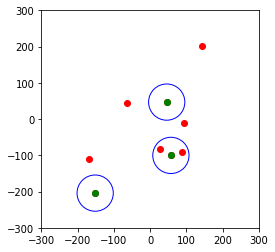

In [ ]:
def visualize_factory_coverage(town_location, factory_idx):
  '''
  visualize the factory and town locations.
  Input:
    town_location : location of town in (x, y) coordinate
    factory_idx : the id of towns chosen to plant a factory
  Output:
    visual output displaying town (red), factory (green) and factory's  delivery range(circle)
  '''
  factory_location = town_location[[factory_idx]]
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  plt.xlim(-300, 300)
  plt.ylim(-300, 300)
  plt.scatter(town_location[:,0], town_location[:,1], color = 'red')
  plt.scatter(factory_location[:,0], factory_location[:,1], color = 'green')
  ax.set_aspect(1)
  for x in factory_location:
    ax.add_artist(plt.Circle((x[0],x[1]), 50, fill=False, color = 'blue'))

  plt.show()
visualize_factory_coverage(town_location, [0, 2, 3])

## Problem 4.2  (Optional) : Hamtaro empire part 2 (K-median clustering problem)

The solution obtained from problem 4.1 is unrealistic as Hamtaro has to plant too many factories. Thus, Hamtaro comes up with a new idea. He now instead only place a few factories and focuses more on goods transportation. After carefully reevaluating the new strategy, Hamtaro now only place 4 factories, but the goods delivery range is unlimited as he has outsourced an inland freight company, which charges 500 THB/km per distance they have travel. The cost is calculated only from the distance from the factory to the towns. To minimize the goods delivery cost, which town should he set up the factories? Formulate the problem as a linear program and solve for an optimal solution.

**Note: This problem is the hardest problem in this assignment. You could search the keyword 'K-median clustering'  for guidance.**

In [ ]:
pass

## Problem 5: Quantile Regression (piecewise linear function)

If you observe the objective function from the problem 6 in the previous lab, the solution that minimizes $l_2$ regression (least square method) and $l_1$ regression is the mean and median of the dataset respectively.  Quantile regression is a generalized formed of $l_1$ regression you have solved in the previous question. Likewise, The solution of quantile regression is the $q^{th}$ quantile of the dataset. A mathematical program for quantile regression is:

####Decision variable $\beta_1, \beta_0$

$$Objective : min( \sum_{i=1}^{N}L_q(y_i - (\beta_1x_i + \beta_0))) $$
\begin{equation*}
s.t.
\begin{split}
  \beta_1, \beta_0 \in R
\end{split}
\end{equation*}

where
\begin{equation*}
\begin{split}
  L_q(x) = \left\{
                \begin{array}{ll}
                  (q-1)x, & x \leq 0\\
                  qx, & x > 0\\
                \end{array}
              \right.
\end{split}
\end{equation*}

Thus, a $l_1$ regression is equivalent to a quantile regression where q = 0.5.

Find $\beta_1, \beta_0$ using quantile regression at q = 0.25, 0.75 by reformulating the problem as a linear program, and compare the result with the one in the previous lab. What can you say about the result?



In [ ]:
pass

# Problem 6 : Instraham


After several crises, Hamtaro is fed up with the manufacturing business and is now looking for new business opportunities. He finds out that opening social media platform could make a hefty sum of money. Moreover, since hamsters do not currently have a social media site, Hamtaro can monopolize the market easily. Therefore, he creates Instraham, the first social media website of hamsters, by hamsters, for hamsters.

After consulting with Koushi-kun, Hamtaro figures out that social network platforms often have the features shown in the table below. For each feature, the CPU load and storage load are shown with its associated business value score.

|Feature name| CPU load (%) | storage load (%) | business value score |
|:-:|:-:|:-:|:-:|
| A | 20 | 30| 10|
| B | 10 | 5| 5|
| C| 30 | 10| 10|
| D | 5 | 10| 3|
| F | 15 | 30| 10|
| G | 60 | 70| 30|
| H | 80 | 80| 80|
| I | 10 | 50| 20|
| J | 3 | 50| 5|

Feature A, and J is mandatory while the rest is optional. The objective is to maximize the business value score of the website while not overloading CPU and storage servers. His engineering friend, Taisho-kun, also suggests him that he could improve the website efficiency by performing the following operations:

- Feature compression. This method will reduce both CPU and storage load by half, but it also reduces the business value to 55% of the original value. Every feature could be compressed, but the number of compressed features in the website is limited to two.

-  The usage of storage efficient algorithm. By using this method, the feature storage load is reduced by half but it also doubles the CPU load. However, only feature H, I, J can use this method. This method could not be used concurrently with feature compression.

From this information, which features should Hamtaro develop? ~~Use Amdahl's law to find the best speedup~~. Formulate the problem as an integer program and solve for an optimal solution.

<b> Note : This problem is based on the blog (https://engineering.fb.com/2021/07/29/data-infrastructure/linear-programming/) </b>


# Answer

From Excel, I have generated this solution table
|Feature	|CPU	|Storage	|Value	|Choose Var	|Compress Var	|efficient Var	|SUM of Var |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|A|20|30|10|0|1| |1|
|B|10|5|5|1|0| |1|
|C|30|10|10|1|0| |1|
|D|5|10|3|0|0| |0|
|F|15|30|10|0|0| |0|
|G|60|70|30|0|0| |0|
|H|80|80|80|0|1|0|1|
|I|10|50|20|0|0|0|0|
|J|3|50|5|0|0|1|1|
|SUM| | | |2|2|1| | |

Maximize Value		69.5
Used CPU			96%
Used Storage		95%

The constraint is
1. the used CPU = SUM of CPU*(Choose_Var + 0.5 * Compress_Var + 2 * efficient_Var) <= 100.
2. the used Storage = SUM of Storage*(Choose_Var + 0.5 * Compress_Var + 0.5 * efficient_Var) <= 100.
3. the number of Compress var <= 2.
4. the SUM of Var <= 1.

	For A,B,C,D,F,G.
	
		SUM of Var = Choose Var + Compress Var
	
	For H,I,J.
	
		SUM of Var = Choose Var + Compress Var + efficient Var
5. for A, J. the Sum of Var = 1.
6. All Var is binary.


The solution is to choose A, B, C, H, J and compress A, H using Feature compression and use storage efficient algorithm on J.
The maximum total value is 69.5

The excel is located in the following link. The constraints is also included in the excel file.

https://chula-my.sharepoint.com/:x:/g/personal/6432133721_student_chula_ac_th/ESku0SchJ1pNj9UQ2KwSPaoBFUZN82dI2HzXL6ihce0G1g?e=yXrv2j